In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy
import pandas
import math

data = pandas.read_csv('ClassificationProblem1.txt', sep="\t")
data = data.set_index("Index", drop =True)
data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
Index,,,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [2]:
data.describe()
data['F15'] = pandas.to_datetime(data['F15'], errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format="%m/%d/%Y", exact=True, unit=None, infer_datetime_format=False)
data['F16'] = pandas.to_datetime(data['F16'], errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format="%m/%d/%Y", exact=True, unit=None, infer_datetime_format=False)
label = data['C']
dat = data.drop(['C'],axis=1)

In [3]:
dat.describe(include='all')

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,1.011800e+05,...,1.011800e+05,1.011800e+05,101180,101180,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8031,6300,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1985-03-13 00:00:00,1991-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,46,55,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1970-06-01 00:00:00,1977-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2005-01-23 00:00:00,2005-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,1.869749e+07,...,1.127538e+07,-5.198163e+07,NaN,NaN,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567
std,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,5.769064e+09,...,5.786659e+09,5.782358e+09,NaN,NaN,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494
min,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-9.999816e+09,...,-9.999852e+09,-9.999767e+09,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,-4.966961e+09,...,-5.027003e+09,-5.070403e+09,NaN,NaN,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000


In [5]:
daf = dat
daf['F15'] =data['F15'].apply(lambda x: x.toordinal())
daf['F16'] =data['F16'].apply(lambda x: x.toordinal())
daf.describe(include= 'all')

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,1.011800e+05,...,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,1.869749e+07,...,1.127538e+07,-5.198163e+07,725738.998942,726832.000227,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567
std,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,5.769064e+09,...,5.786659e+09,5.782358e+09,1461.737178,1097.353677,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494
min,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-9.999816e+09,...,-9.999852e+09,-9.999767e+09,719314.000000,722038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,-4.966961e+09,...,-5.027003e+09,-5.070403e+09,724747.750000,726092.000000,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000
50%,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,4.346691e+07,...,9.416236e+06,-8.816174e+07,725734.000000,726832.000000,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000
75%,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,5.019440e+09,...,5.032947e+09,4.947133e+09,726726.000000,727571.000000,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000
max,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9.999497e+09,...,9.999951e+09,9.999997e+09,731969.000000,732009.000000,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000


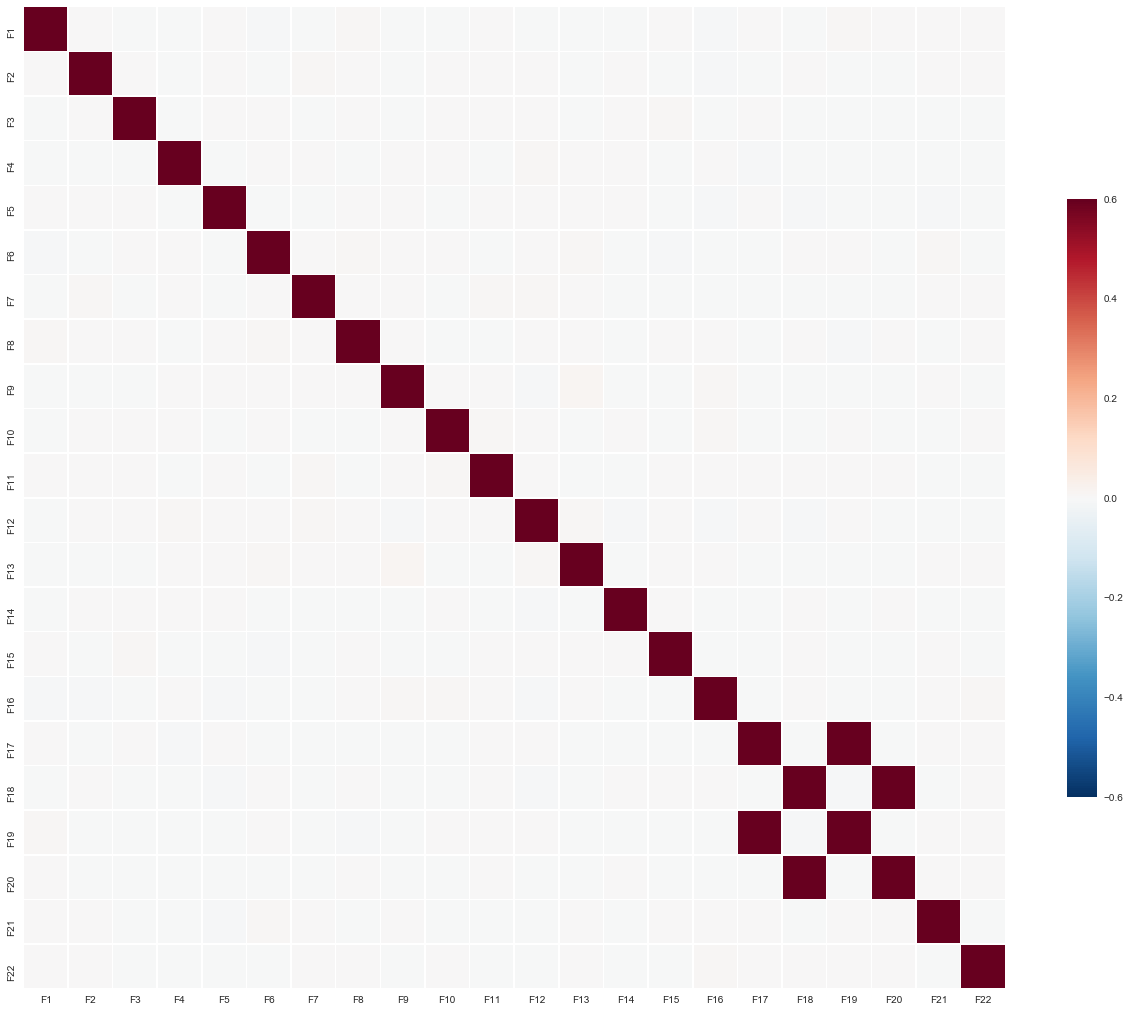

In [6]:
#calculating correlation
core = daf.corr(method='pearson')
_num_size = core.shape
f, ax = plt.subplots(figsize=_num_size)
sns.heatmap(core, vmax=0.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#F19 has a high correlation with F17, F20 with F18

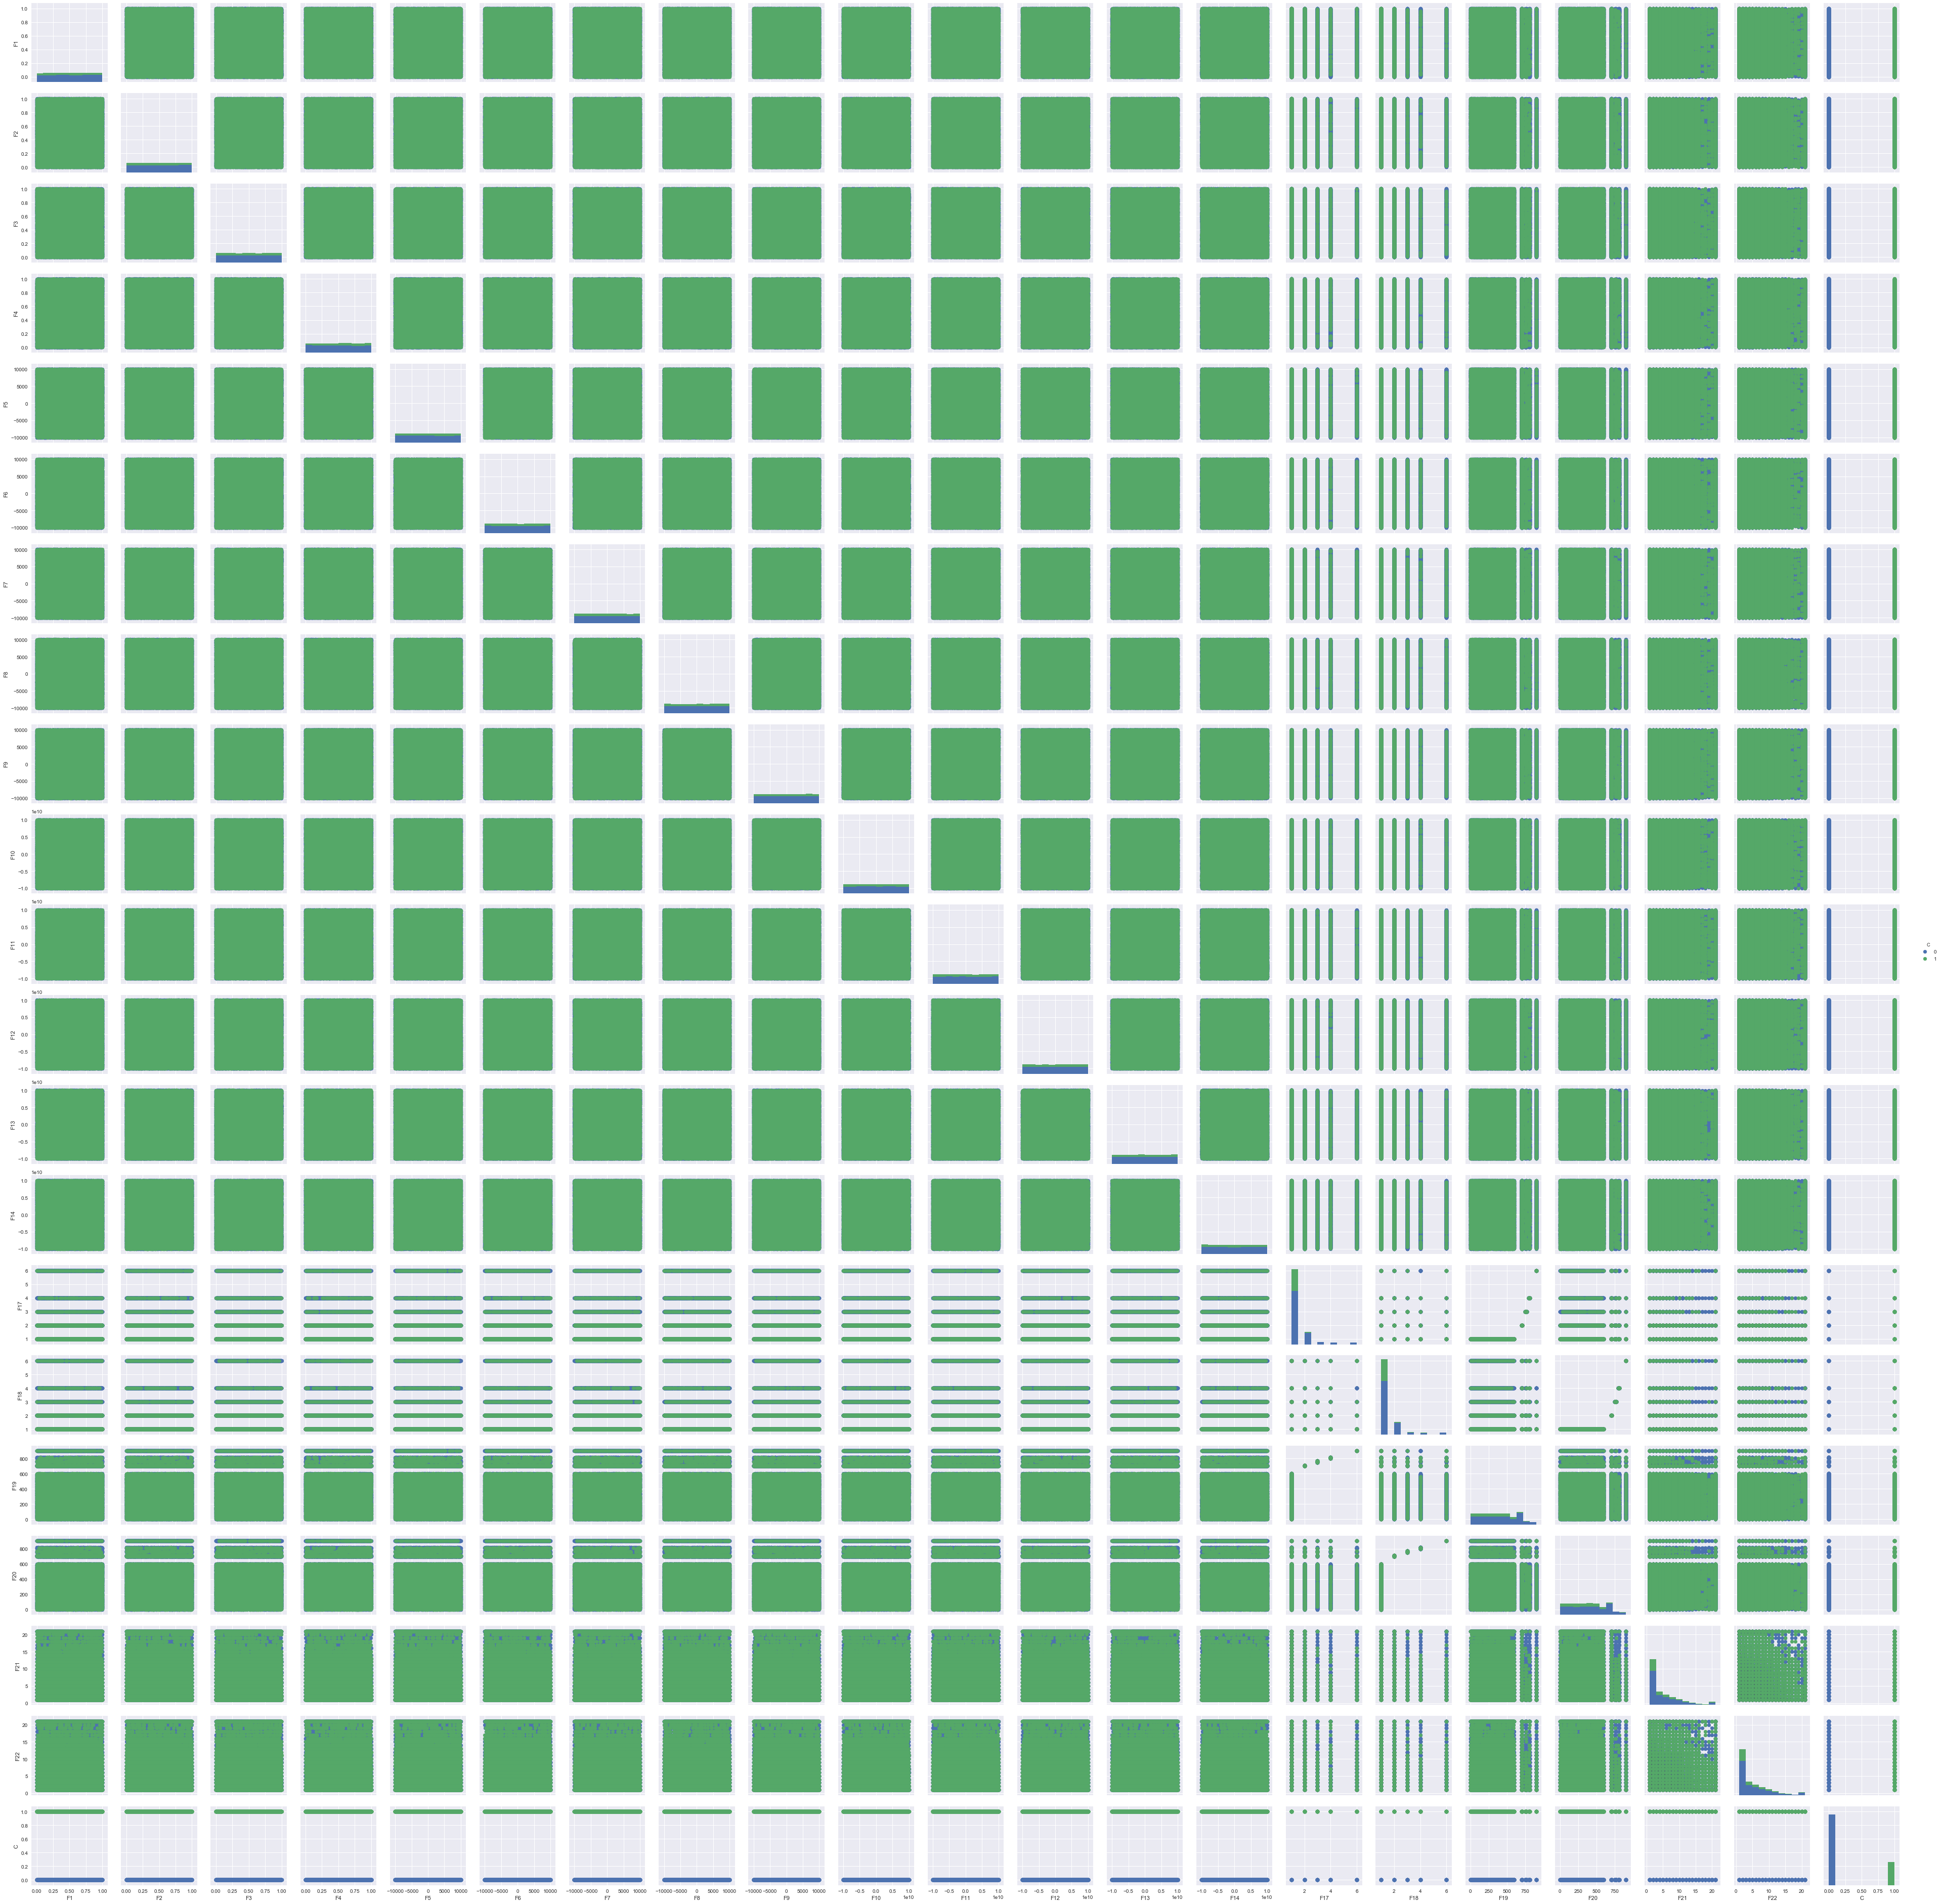

In [5]:
g = sns.PairGrid(data, hue='C')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

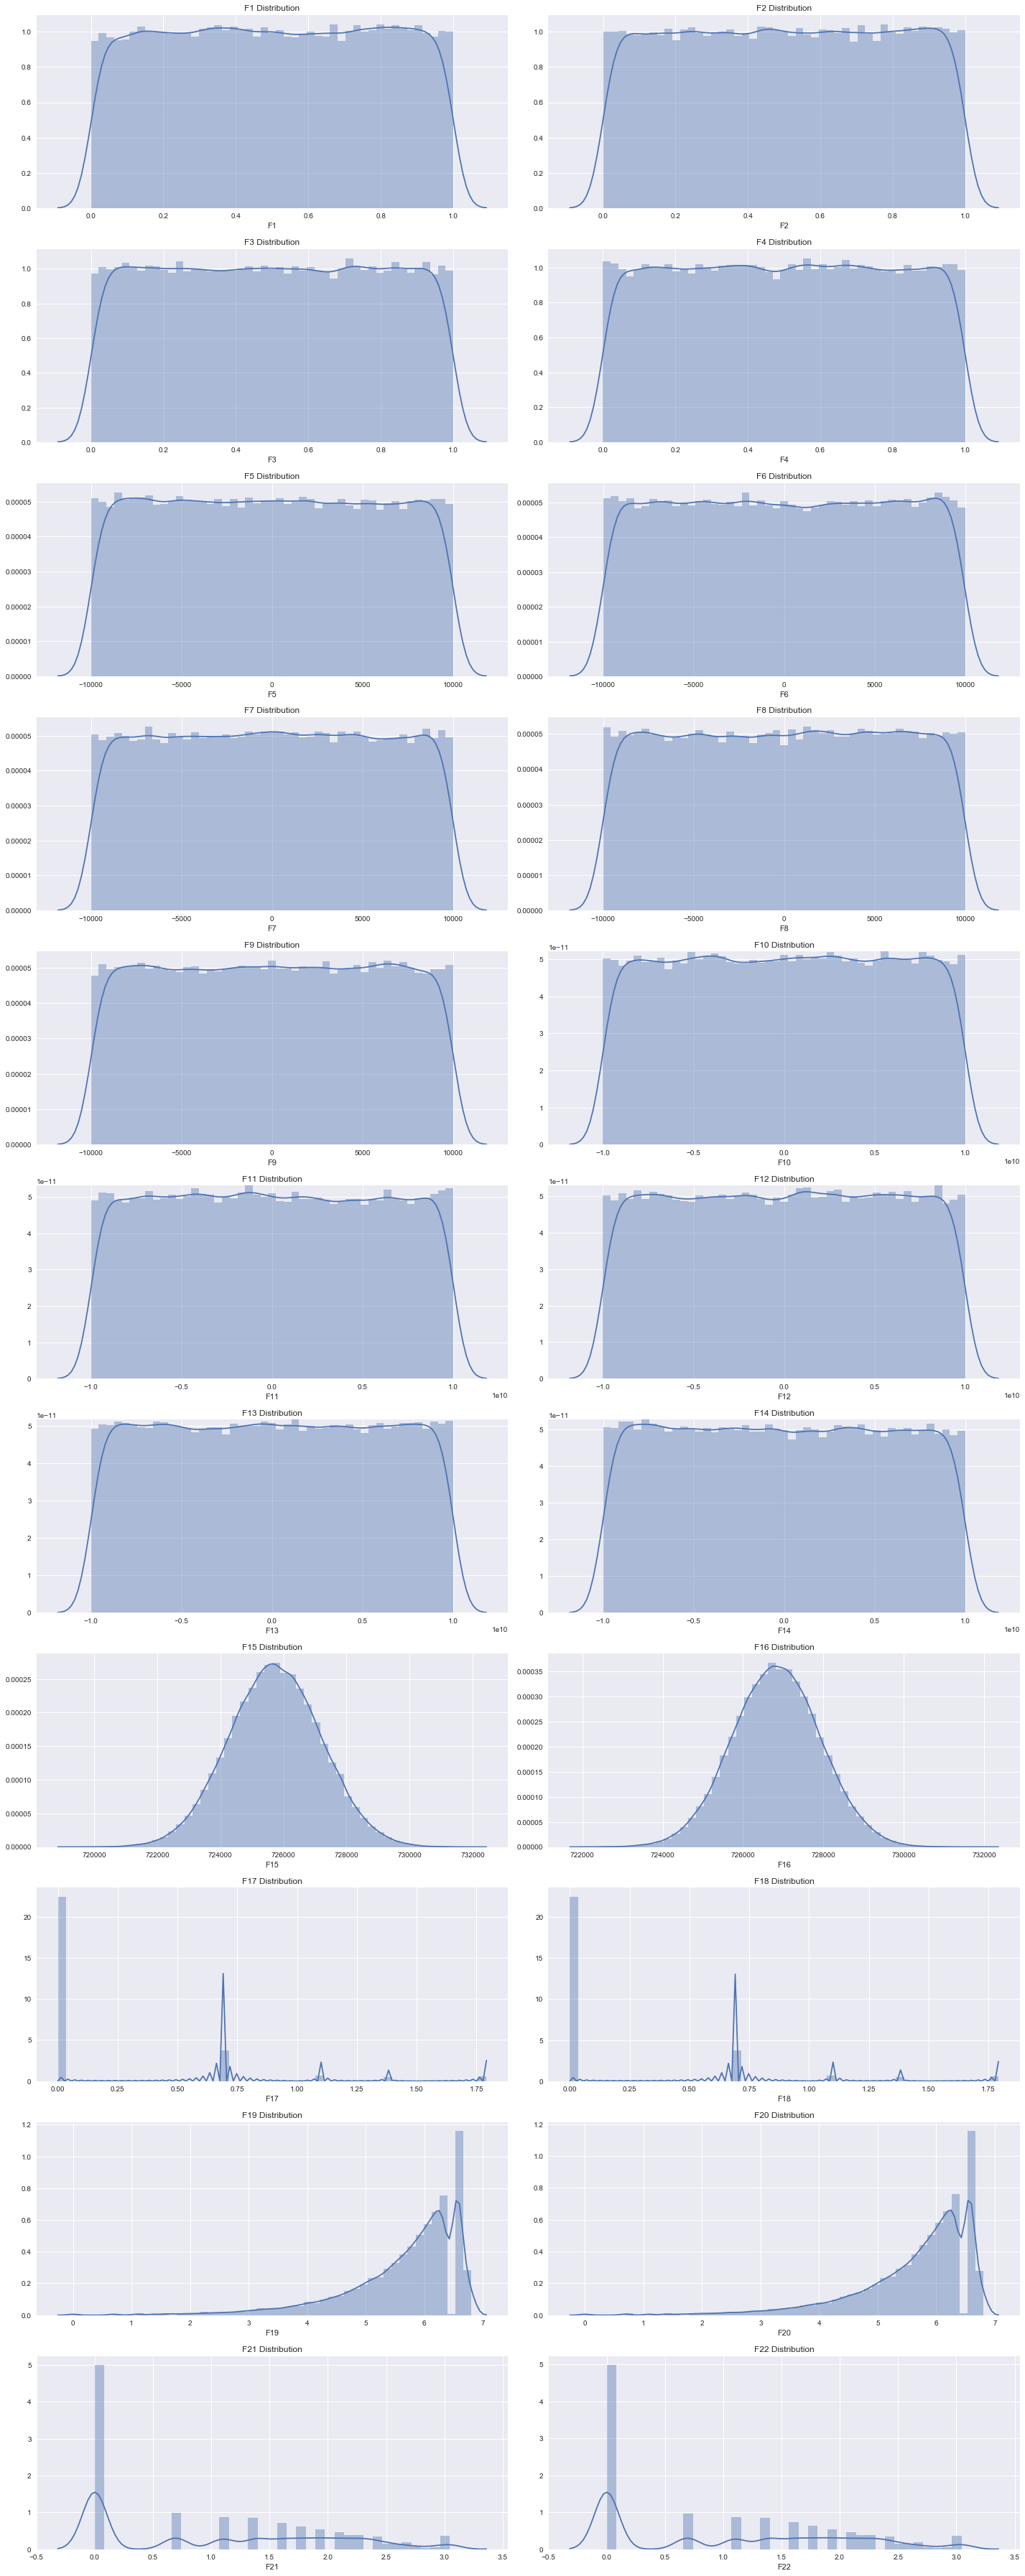

In [9]:
#Checking the distribution of data
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,50))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #df[var_name].hist(bins=10,ax=ax)
        sns.distplot(df[var_name])
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(daf, daf.columns, 11, 2)

In [7]:
# Log-transform the skewed features
skewed = ['F17', 'F18', 'F19','F20','F21','F22']
daf[skewed] = daf[skewed].apply(lambda x: numpy.log(x))


In [8]:
draw_histograms(daf, daf.columns, 10, 2)

NameError: name 'draw_histograms' is not defined

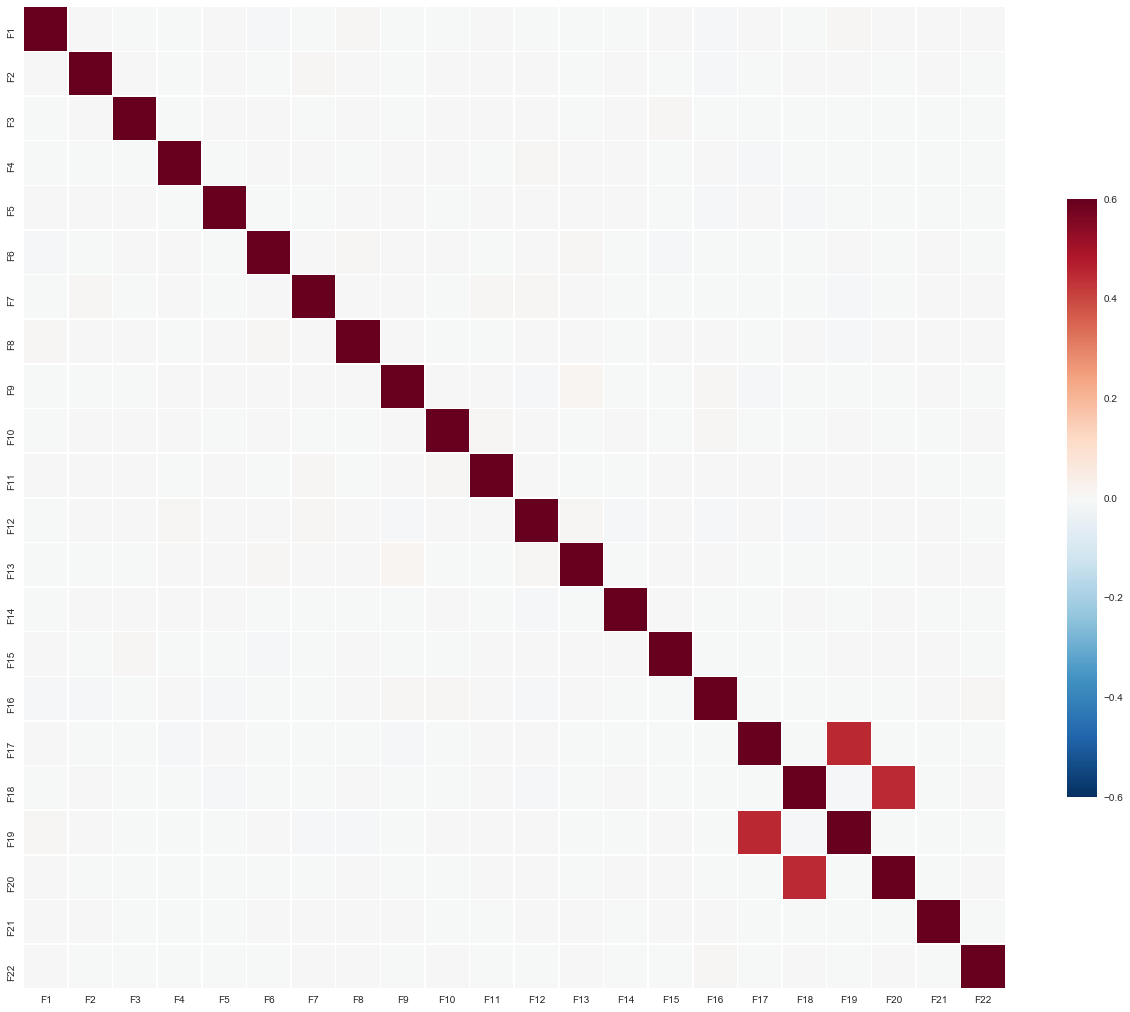

In [10]:
core = daf.corr(method='pearson')
_num_size = core.shape
f, ax = plt.subplots(figsize=_num_size)
sns.heatmap(core, vmax=0.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [24]:
daf = daf.drop(['F10','F12','F13','F14'], axis=1)
daf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101180 entries, 1 to 101180
Data columns (total 7 columns):
F11    101180 non-null int64
F15    101180 non-null int64
F16    101180 non-null int64
F19    101180 non-null float64
F20    101180 non-null float64
F21    101180 non-null float64
F22    101180 non-null float64
dtypes: float64(4), int64(3)
memory usage: 10.2 MB


In [25]:
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
X_train, X_test, y_train, y_test = train_test_split(daf, label, test_size = 0.2, random_state = 42)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])



from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: data training set
       - y_train: label training set
       - X_test: data testing set
       - y_test: label testing set
    '''
    
    results = {}
    
    sample_size=int(sample_size)
    
    #  Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train.iloc[:sample_size, :], y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end-start
        
    #  Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[:300, :])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end-start
            
    #  Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train.iloc[:300], predictions_train, sample_weight=None)
        
    #  Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test, sample_weight=None)
    
    #  Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train.iloc[:300], predictions_train, beta=0.5)
        
    #  Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j/3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j/3, j%3].set_xlabel("Training Set Size")
                ax[j/3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

Training set has 80944 samples.
Testing set has 20236 samples.


DecisionTreeClassifier trained on 809 samples.
DecisionTreeClassifier trained on 8094 samples.
DecisionTreeClassifier trained on 80944 samples.
LogisticRegression trained on 809 samples.
LogisticRegression trained on 8094 samples.
LogisticRegression trained on 80944 samples.
GaussianNB trained on 809 samples.
GaussianNB trained on 8094 samples.
GaussianNB trained on 80944 samples.


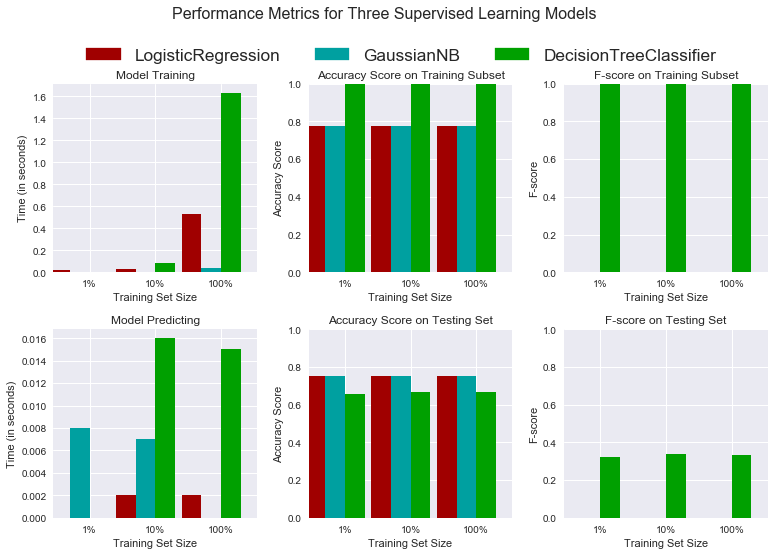

In [26]:
#  Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the three models
clf_A = DecisionTreeClassifier(random_state=5)
clf_B = LogisticRegression(random_state=8)
clf_C = GaussianNB()

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = 0.01 * X_train.shape[0]
samples_10 = 0.1 * X_train.shape[0]
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the supervised learning models chosen
evaluate(results)

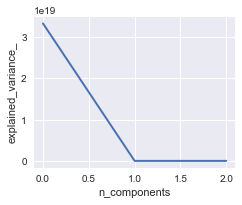

In [30]:
#PCA application
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
data_transform = pca.fit(X_train)
data_transform = pca.fit_transform(X_train)
data_transform_test = pca.fit_transform(X_test)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

LinearSVC trained on 809 samples.
LinearSVC trained on 8094 samples.
LinearSVC trained on 80944 samples.
GradientBoostingClassifier trained on 809 samples.
GradientBoostingClassifier trained on 8094 samples.
GradientBoostingClassifier trained on 80944 samples.
GaussianNB trained on 809 samples.
GaussianNB trained on 8094 samples.
GaussianNB trained on 80944 samples.


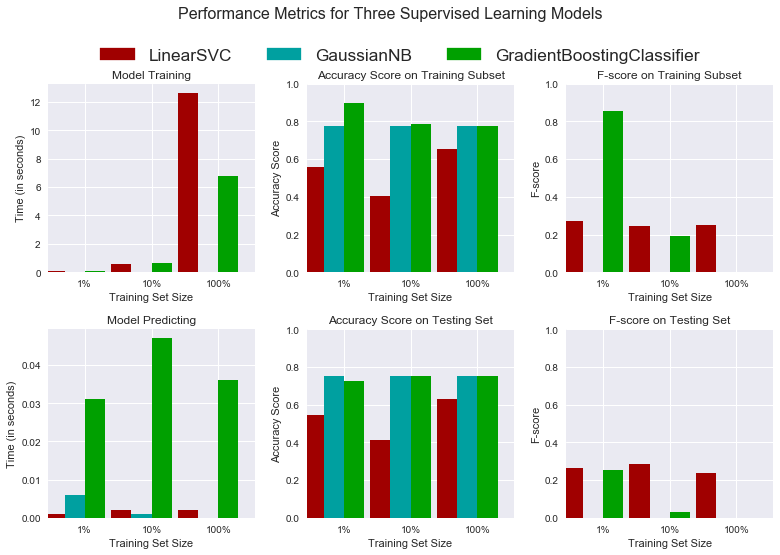

In [33]:
#  Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the three models
clf_A = LinearSVC(random_state=5)
clf_B = GradientBoostingClassifier(random_state=8)
clf_C = GaussianNB()

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = 0.01 * X_train.shape[0]
samples_10 = 0.1 * X_train.shape[0]
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the supervised learning models chosen
evaluate(results)

DecisionTreeClassifier trained on 809 samples.
DecisionTreeClassifier trained on 8094 samples.
DecisionTreeClassifier trained on 80944 samples.
GradientBoostingClassifier trained on 809 samples.
GradientBoostingClassifier trained on 8094 samples.
GradientBoostingClassifier trained on 80944 samples.
GaussianNB trained on 809 samples.
GaussianNB trained on 8094 samples.
GaussianNB trained on 80944 samples.


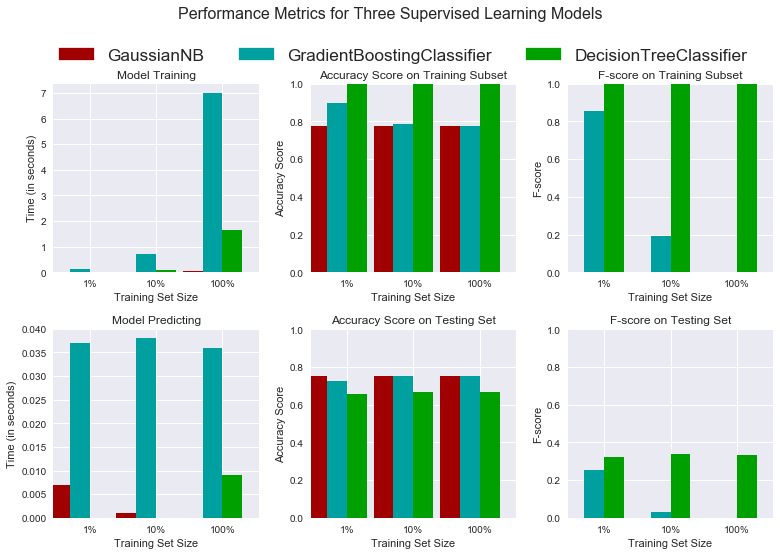

In [34]:
#  Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the three models
clf_A = DecisionTreeClassifier(random_state=5)
clf_B = GradientBoostingClassifier(random_state=8)
clf_C = GaussianNB()

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = 0.01 * X_train.shape[0]
samples_10 = 0.1 * X_train.shape[0]
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the supervised learning models chosen
evaluate(results)

In [53]:
from sklearn.tree import DecisionTreeClassifier

selclasifier = DecisionTreeClassifier(max_depth=50, min_samples_leaf=10)
selclasifier.fit(data_transform,y_train)
predictions_test = selclasifier.predict(data_transform_test)

acc= accuracy_score(y_test, predictions_test, sample_weight=None)
print "accuracy: "
print acc
print "Fbeta: "
print fbeta_score(y_test, predictions_test, beta=0.5)

accuracy: 
0.715210515912
Fbeta: 
0.169584245077


In [64]:
#Accuracy using PCA analysis data

#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

#  Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

#  Create the parameters list you wish to tune

mf = ['auto', 'log2', None] 
mxl = [5, 10, 50, 100, 150, 200, 500, 1000, None]
mxde= [10, 50, 100, 500, 1000, None]
max_iter = [1000]
parameters = dict(max_features = mf, max_depth = mxde, max_leaf_nodes = mxl)

ssscv = StratifiedKFold(n_splits=10)


# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score , beta =0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,cv=ssscv, scoring= scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(data_transform, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(data_transform, y_train)).predict(data_transform_test)
best_predictions = best_clf.predict(data_transform_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.6184
F-score on testing data: 0.2456

Optimized Model
------
Final accuracy score on the testing data: 0.6184
Final F-score on the testing data: 0.2456


In [65]:
#Accuracy using normal data
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

#  Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

#  Create the parameters list you wish to tune

mf = ['auto', 'log2', None] 
mxl = [5, 10, 50, 100, 150, 200, 500, 1000, None]
mxde= [10, 50, 100, 500, 1000, None]
max_iter = [1000]
parameters = dict(max_features = mf, max_depth = mxde, max_leaf_nodes = mxl)

ssscv = StratifiedKFold(n_splits=10)


# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score , beta =0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,cv=ssscv, scoring= scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.6657
F-score on testing data: 0.3323

Optimized Model
------
Final accuracy score on the testing data: 0.6657
Final F-score on the testing data: 0.3323


In [66]:
X_train.head()

,F11,F15,F16,F19,F20,F21,F22
Index,,,,,,,
36864,740223435,726498,726313,6.306275,4.828314,0.000000,0.000000
29020,-4964667189,728318,727873,1.945910,6.556778,0.693147,0.000000
93194,-4810495189,726882,727015,3.496508,5.129899,0.000000,0.000000
4412,4669382429,726473,726900,6.013715,5.924256,0.000000,0.000000
25080,-1361292271,725884,727377,1.386294,5.953243,2.302585,0.693147
